# Data curation of precipitation and evapotranspiration data for use in LUMPREM
This notebook describes setting up of precipitation and evapotranspiration data for use in the LUMPREM model.

## Background
LUMPREM is a lumped parameter's model that can be used to construct time-series (TS) input-files for the boundary condition packages RCH (recharge), EVT (evapotranspiration) and GHB (general head boundary) for MODFLOW 6 transient models.

LUMPREM takes input data for precipitation, potential evaporation and irrigation.

Because irrigation is not a factor at the Hagfors site, we will only be using precipitation and evapotranspiration data as input.

### Description of precipitation data
The authority SMHI (Swedish Meteorological and Hydrological Institute) collects precipitation data from a large number of monitoring stations across the country.

The weather station closest to Hagfors is situated in Gustavsfors, approximately 15 kilometers to the NNE (see first image below).

The station records daily precipitation data. This data has been downloaded and stored in the file `smhi-opendata_5_103100_20210413_212824.csv` in the directory \data\raw_data\precipitation_evapotranspiration.

### Description of evapotranspiration data
SMHI estimates monthly evapotranspiration for a large number of catchments in Sweden, using the national model S-HYPE (see this link for more information: https://www.smhi.se/en/research/research-departments/hydrology/hype-our-hydrological-model-1.7994 as well as Lindström et al., 2010)

S-HYPE data has been downloaded for the appropriate catchment (64808) and is stored in the file `smhi-s-hype-64808.xls` in the directory \data\raw_data\precipitation_evapotranspiration. See second image below for coverage of modeled area.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

Gustavsfors, where the weather station is situated, is located approximately 15 kilometers NNE of Hagfors:

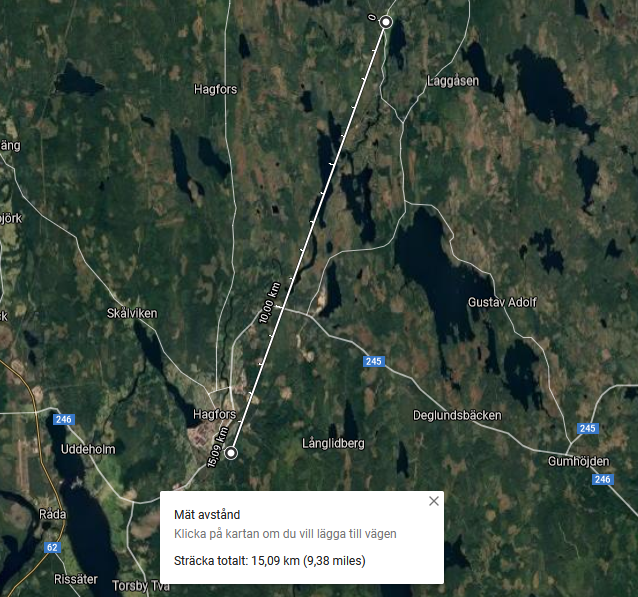

In [2]:
Image(filename="figures/gustavsfors.png")

Coverage of catchment for which monthly evapotranspiration is estimated using the national S-HYPE model:

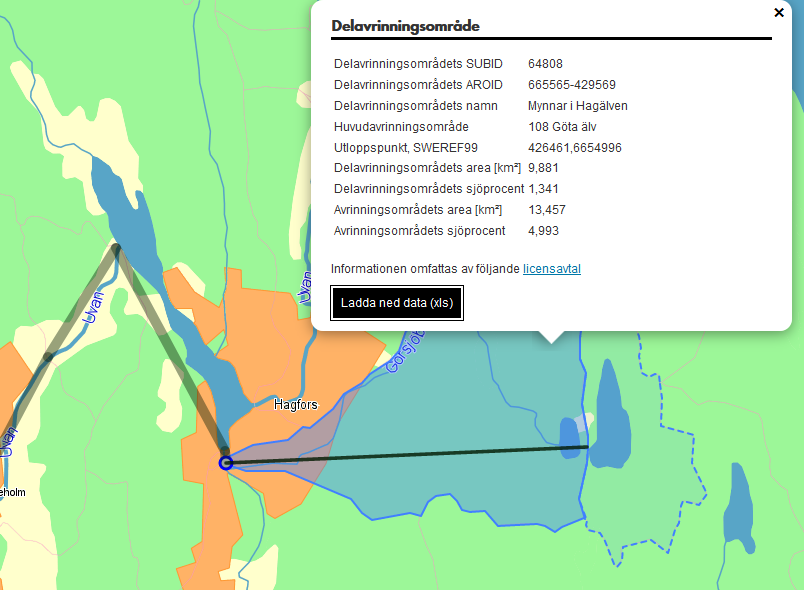

In [3]:
Image(filename="figures/hagfors-s-hype.png")

In [4]:
data_dir = os.path.join('..', '..', 'data', 'raw_data', 'precipitation_evapotranspiration')
assert data_dir

In [5]:
os.listdir(data_dir)

['readme.md',
 'smhi-opendata_5_103100_20210413_212824.csv',
 'smhi-s-hype-64808.xls']

## Curation of precipitation data

In [6]:
df = pd.read_csv(os.path.join(data_dir, 'smhi-opendata_5_103100_20210413_212824.csv'), delimiter=';', header=6)
display(df)

,Från Datum Tid (UTC),Till Datum Tid (UTC),Representativt dygn,Nederbördsmängd,Kvalitet,Unnamed: 5,Tidsutsnitt:
0,1995-08-01 06:00:01,1995-08-02 06:00:00,1995-08-01,0.0,G,NaN,Kvalitetskontrollerade historiska data (utom d...
1,1995-08-02 06:00:01,1995-08-03 06:00:00,1995-08-02,6.8,G,NaN,Tidsperiod (fr.o.m.) = 1995-08-01 00:00:00 (UTC)
2,1995-08-03 06:00:01,1995-08-04 06:00:00,1995-08-03,0.7,G,NaN,Tidsperiod (t.o.m.) = 2021-01-01 06:00:00 (UTC)
3,1995-08-04 06:00:01,1995-08-05 06:00:00,1995-08-04,0.0,G,NaN,Värdet är summerat över = 24 timmar
4,1995-08-05 06:00:01,1995-08-06 06:00:00,1995-08-05,0.0,G,NaN,NaN
...,...,...,...,...,...,...,...
9251,2020-12-27 06:00:01,2020-12-28 06:00:00,2020-12-27,6.0,G,NaN,NaN
9252,2020-12-28 06:00:01,2020-12-29 06:00:00,2020-12-28,2.9,G,NaN,NaN
9253,2020-12-29 06:00:01,2020-12-30 06:00:00,2020-12-29,1.2,G,NaN,NaN
9254,2020-12-30 06:00:01,2020-12-31 06:00:00,2020-12-30,4.2,G,NaN,NaN


Select pertinent columns and translate them to English:

In [7]:
df = df[['Representativt dygn', 'Nederbördsmängd']]

In [8]:
df.rename(columns={'Representativt dygn': 'datetime', 'Nederbördsmängd': 'precipitation'}, inplace=True)
display(df)

,datetime,precipitation
0,1995-08-01,0.0
1,1995-08-02,6.8
2,1995-08-03,0.7
3,1995-08-04,0.0
4,1995-08-05,0.0
...,...,...
9251,2020-12-27,6.0
9252,2020-12-28,2.9
9253,2020-12-29,1.2
9254,2020-12-30,4.2


Make sure the datetime column contain datetime values:

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])

Select the studied time-period (1 January 2016 - 1 January 2020):

In [10]:
#greater than the start date and smaller than the end date
start_date = pd.Timestamp('2015-12-31') #Must be the day before the first day
end_date = pd.Timestamp('2020-01-01')
mask = (df['datetime'] > start_date) & (df['datetime'] <= end_date)

In [11]:
df = df.loc[mask].reset_index(drop=True)
display(df)

,datetime,precipitation
0,2016-01-01,2.6
1,2016-01-02,0.7
2,2016-01-03,0.4
3,2016-01-04,0.0
4,2016-01-05,0.0
...,...,...
1457,2019-12-28,3.9
1458,2019-12-29,0.5
1459,2019-12-30,0.0
1460,2019-12-31,0.0


Convert precipitation from millimeters to meters (required by LUMPREM):

In [12]:
df['precipitation'] = df['precipitation'] / 1000

Insert simulation day (required by LUMPREM, use index + 1 to adjust for Python zero-indexation):

In [13]:
df['simulation_day'] = df.index + 1

Setup connection to the lumprem input-data folder:

In [14]:
lumprem_dir = os.path.join('..', '..', 'data', 'lumprem_input')
if not os.path.exists(lumprem_dir):
    os.mkdir(lumprem_dir)
assert lumprem_dir

Save output data to lumprem model folder:

In [15]:
output_file = df[['simulation_day','precipitation']]
display(output_file)

,simulation_day,precipitation
0,1,0.0026
1,2,0.0007
2,3,0.0004
3,4,0.0000
4,5,0.0000
...,...,...
1457,1458,0.0039
1458,1459,0.0005
1459,1460,0.0000
1460,1461,0.0000


In [16]:
output_file.to_csv(os.path.join(lumprem_dir, 'rainfall.dat'), sep=' ', header=False, index=False)

rainfall.dat is now created (which will be used as input for LUMPREM through lumpyrem.

## Curation of evapotranspiration data

In [17]:
xl_file = pd.ExcelFile(os.path.join(data_dir, 'smhi-s-hype-64808.xls'))

In [18]:
xl_file.sheet_names

['Områdesinformation',
 'Referenser',
 'Sjöuppgifter',
 'Källfördelning',
 'Uppströmsområden',
 'Årsvärden',
 'Månadsvärden',
 'Dygnsvärden',
 'Dygnsuppdaterade värden']

Select the sheet containing monthly evapotranspiration data:

In [19]:
df2 = xl_file.parse('Månadsvärden')
display(df2)

,Unnamed: 0,Total\nvattenföring\n[m³/s],Total\nstationskorrigerad\nvattenföring\n[m³/s],Total\nnaturlig\nvattenföring\n[m³/s],Lokal\nvattenföring\n[m³/s],Total\nkvävetransport\n[kg],Total\nfosfortransport\n[kg],Lokal\nkvävetransport\n[kg],Lokal\nfosfortransport\n[kg],Total\nkvävekoncentration\n[ug/l],Total\nfosforkoncentration\n[ug/l],Total koncentration\nav oorganiskt kväve\n[ug/l],Total koncentration\nav löst reaktivt fosfor\n[ug/l],Total\nsedimenttransport\n[kg],Total\nsedimentkoncentration\n[mg/l],Lokal\nnederbörd\n[mm],Lokal\nevapotranspiration\n[mm],Lokal\nlufttemperatur\n[°C],Vattendragstemperatur\n[°C]
0,2004-01,0.131,0.131,0.131,0.075,120.0,4.19,72.2,3.07,342.0,12.0,69.5,2.76,215.0,0.710,48.8,7.0,-6.4,0.3
1,2004-02,0.130,0.130,0.130,0.094,127.0,5.66,97.9,4.91,392.0,17.4,91.2,3.57,337.0,1.100,39.2,6.3,-4.7,0.3
2,2004-03,0.293,0.293,0.293,0.236,438.0,16.10,389.0,14.80,558.0,20.5,104.0,3.48,729.0,0.965,35.2,10.6,-1.1,0.5
3,2004-04,0.110,0.110,0.110,0.057,102.0,3.76,55.2,2.69,357.0,13.2,79.6,2.71,109.0,0.464,28.4,29.8,5.3,7.0
4,2004-05,0.025,0.025,0.025,0.012,25.1,1.14,11.1,0.63,382.0,17.3,96.8,4.30,25.8,0.623,24.7,49.5,10.2,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2019-10,0.361,0.361,0.361,0.271,536.0,17.30,454.0,15.20,554.0,17.9,48.3,2.95,1240.0,1.380,97.1,28.6,3.6,7.0
190,2019-11,0.343,0.343,0.343,0.257,478.0,15.60,400.0,13.80,538.0,17.6,54.4,3.11,834.0,0.981,102.0,18.5,-0.3,2.6
191,2019-12,0.452,0.452,0.452,0.321,639.0,20.50,505.0,17.50,528.0,16.9,68.0,3.22,842.0,0.729,90.3,16.4,-1.1,1.7
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Translate pertinent columns:

In [20]:
df2.rename(columns={'Unnamed: 0': 'datetime', 'Lokal\nevapotranspiration\n[mm]': 'evapot'}, inplace=True)

Filter out non-pertinent columns:

In [21]:
df2 = df2[['datetime', 'evapot']]
display(df2)

,datetime,evapot
0,2004-01,7.0
1,2004-02,6.3
2,2004-03,10.6
3,2004-04,29.8
4,2004-05,49.5
...,...,...
189,2019-10,28.6
190,2019-11,18.5
191,2019-12,16.4
192,NaN,NaN


Remove last two columns:

In [22]:
df2 = df2[:-2]
display(df2)

,datetime,evapot
0,2004-01,7.0
1,2004-02,6.3
2,2004-03,10.6
3,2004-04,29.8
4,2004-05,49.5
...,...,...
187,2019-08,80.0
188,2019-09,53.8
189,2019-10,28.6
190,2019-11,18.5


Parse the month-datestrings into datetime format:

In [23]:
df2['datetime'] = pd.to_datetime(df2['datetime'], format='%Y-%m')

### Convert monthly average values into daily average values

Start by retrieving the number of days in each month:

In [24]:
df2['days_in_month'] = [pd.Period(str(i)).days_in_month for i in df2['datetime']]
display(df2)

,datetime,evapot,days_in_month
0,2004-01-01,7.0,31
1,2004-02-01,6.3,29
2,2004-03-01,10.6,31
3,2004-04-01,29.8,30
4,2004-05-01,49.5,31
...,...,...,...
187,2019-08-01,80.0,31
188,2019-09-01,53.8,30
189,2019-10-01,28.6,31
190,2019-11-01,18.5,30


Compute mean daily evapotranspiration:

In [25]:
df2['mean_daily_evapot'] = df2['evapot'] / df2['days_in_month']
display(df2)

,datetime,evapot,days_in_month,mean_daily_evapot
0,2004-01-01,7.0,31,0.225806
1,2004-02-01,6.3,29,0.217241
2,2004-03-01,10.6,31,0.341935
3,2004-04-01,29.8,30,0.993333
4,2004-05-01,49.5,31,1.596774
...,...,...,...,...
187,2019-08-01,80.0,31,2.580645
188,2019-09-01,53.8,30,1.793333
189,2019-10-01,28.6,31,0.922581
190,2019-11-01,18.5,30,0.616667


Convert mean daily evapotranspiration from millimeters to meters (required by LUMPREM):

In [26]:
df2['mean_daily_evapot'] = df2['mean_daily_evapot'] / 1000
display(df2)

,datetime,evapot,days_in_month,mean_daily_evapot
0,2004-01-01,7.0,31,0.000226
1,2004-02-01,6.3,29,0.000217
2,2004-03-01,10.6,31,0.000342
3,2004-04-01,29.8,30,0.000993
4,2004-05-01,49.5,31,0.001597
...,...,...,...,...
187,2019-08-01,80.0,31,0.002581
188,2019-09-01,53.8,30,0.001793
189,2019-10-01,28.6,31,0.000923
190,2019-11-01,18.5,30,0.000617


Select the studied time-period (1 January 2016 - 1 January 2020):

In [27]:
mask = (df2['datetime'] > '2015-12-01') & (df2['datetime'] <= end_date) #Must be one month before the first
df2 = df2.loc[mask].reset_index(drop=True)
display(df2)

,datetime,evapot,days_in_month,mean_daily_evapot
0,2016-01-01,8.5,31,0.000274
1,2016-02-01,7.5,29,0.000259
2,2016-03-01,15.7,31,0.000506
3,2016-04-01,31.2,30,0.001040
4,2016-05-01,63.7,31,0.002055
5,2016-06-01,66.4,30,0.002213
6,2016-07-01,80.4,31,0.002594
7,2016-08-01,74.5,31,0.002403
8,2016-09-01,46.8,30,0.001560
9,2016-10-01,17.1,31,0.000552


Re-index DF in order to forward-fill each column with daily values based on mean daily evapotranspiration:

In [28]:
df2.index = df2['datetime']
df2.head()

,datetime,evapot,days_in_month,mean_daily_evapot
datetime,,,,
2016-01-01,2016-01-01,8.5,31,0.000274
2016-02-01,2016-02-01,7.5,29,0.000259
2016-03-01,2016-03-01,15.7,31,0.000506
2016-04-01,2016-04-01,31.2,30,0.001040
2016-05-01,2016-05-01,63.7,31,0.002055


In [29]:
start_date = df2.index.min() - pd.DateOffset(day=1)
end_date = df2.index.max() + pd.DateOffset(day=31)

In [30]:
dates = pd.date_range(start_date, end_date, freq='D')
dates.name = 'date'
df2 = df2.reindex(dates, method='ffill')
display(df2)

,datetime,evapot,days_in_month,mean_daily_evapot
date,,,,
2016-01-01,2016-01-01,8.5,31,0.000274
2016-01-02,2016-01-01,8.5,31,0.000274
2016-01-03,2016-01-01,8.5,31,0.000274
2016-01-04,2016-01-01,8.5,31,0.000274
2016-01-05,2016-01-01,8.5,31,0.000274
...,...,...,...,...
2019-12-27,2019-12-01,16.4,31,0.000529
2019-12-28,2019-12-01,16.4,31,0.000529
2019-12-29,2019-12-01,16.4,31,0.000529


Insert the last day manually (under the assumption that the same evapotranspiration from the day before still applies):

In [31]:
new_row = {
    'datetime': pd.to_datetime('2020-01-01'),
    'evapot':16.4,
    'days_in_month': 31,
    'mean_daily_evapot':0.000529,
}

In [32]:
df2 = df2.append(new_row, ignore_index=True)

Insert simulation day (required by LUMPREM, use index + 1 to adjust for Python zero-indexation):

In [33]:
df2['simulation_day'] = df.index + 1
display(df2)

,datetime,evapot,days_in_month,mean_daily_evapot,simulation_day
0,2016-01-01,8.5,31,0.000274,1
1,2016-01-01,8.5,31,0.000274,2
2,2016-01-01,8.5,31,0.000274,3
3,2016-01-01,8.5,31,0.000274,4
4,2016-01-01,8.5,31,0.000274,5
...,...,...,...,...,...
1457,2019-12-01,16.4,31,0.000529,1458
1458,2019-12-01,16.4,31,0.000529,1459
1459,2019-12-01,16.4,31,0.000529,1460
1460,2019-12-01,16.4,31,0.000529,1461


Select pertinent columns and create the file to be used by LUMPREM:

In [34]:
output_file = df2[['simulation_day','mean_daily_evapot']]
display(output_file)

,simulation_day,mean_daily_evapot
0,1,0.000274
1,2,0.000274
2,3,0.000274
3,4,0.000274
4,5,0.000274
...,...,...
1457,1458,0.000529
1458,1459,0.000529
1459,1460,0.000529
1460,1461,0.000529


In [35]:
output_file.to_csv(os.path.join(lumprem_dir, 'evapot.dat'), sep=' ', header=False, index=False)

Verify file creation:

In [36]:
os.listdir(lumprem_dir)

['evapot.dat', 'rainfall.dat']

Done. Let's have a look at the data before setting up LUMPREM:

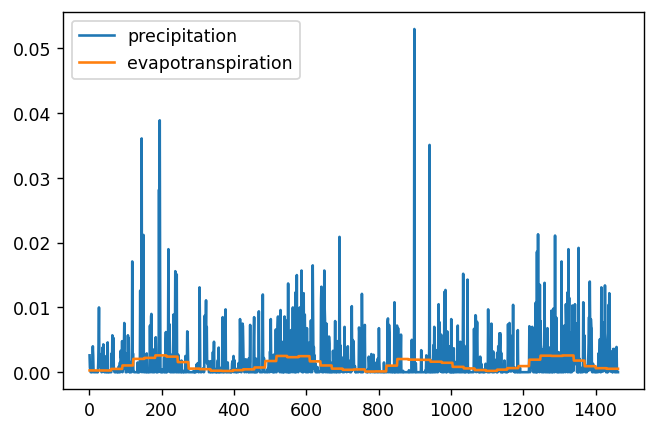

In [37]:
plt.figure(dpi=125)
x = df['simulation_day']

y1 = df['precipitation']
y2 = df2['mean_daily_evapot']

plt.plot(x, y1, label='precipitation')
plt.plot(x, y2, label='evapotranspiration')
plt.legend()